In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
plt.rcParams.update({'font.size': 10})

In [5]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

In [7]:
def define_plot_col(ax):
    plt.xlabel('Time (s)')
    plt.ylabel('Collisions (bool)')
    plt.legend()
    plt.show()

# Plots for the learning curve experiment

In [8]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [9]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [10]:
def compTime(df):
    return df['absoluteTime'].iloc[-1] - df['absoluteTime'].iloc[0]

In [11]:
path_to_folder = "./Learning_Curve/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []

In [12]:
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

./Learning_Curve\sub01_Controller\
./Learning_Curve\sub01_MotionCapture\
./Learning_Curve\sub02_Controller\
./Learning_Curve\sub02_MotionCapture\
./Learning_Curve\sub03_Controller\
./Learning_Curve\sub03_MotionCapture\
./Learning_Curve\sub04_Controller\
./Learning_Curve\sub04_MotionCapture\
./Learning_Curve\sub05_Controller\
./Learning_Curve\sub05_MotionCapture\


In [31]:
fields = ['first_motion', 'last_motion', 'first_remote', 'last_remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

logs['first_motion'] = [logs[x][0] for x in sub_motion]
logs['last_motion'] = [logs[x][-1] for x in sub_motion]
logs['first_remote'] = [logs[x][0] for x in sub_remote]
logs['last_remote'] = [logs[x][-1] for x in sub_remote]


time = {}
for i in fields:
    time[i] = []
    for j in logs[i]:
        time[i].append(compTime(j))
    print(i)
    print(time[i])
    print(np.mean(time[i]))
    print(np.std(time[i]))

first_motion
[26.73883819580078, 56.83778762817383, 108.18965148925781, 52.7387809753418, 37.28846740722656]
56.35870513916016
28.074154859673175
last_motion
[18.48773193359375, 42.438934326171875, 87.2391357421875, 55.088836669921875, 34.08905029296875]
47.46873779296875
23.168789873738124
first_remote
[36.68891906738281, 73.68862915039062, 216.49090766906738, 39.73820495605469, 39.23795127868652]
81.1689224243164
69.02343930554017
last_remote
[25.53936767578125, 29.975521087646484, 85.63897705078125, 25.188079833984375, 48.438262939453125]
42.956041717529295
22.9757378039666


NameError: name 'first_runs' is not defined

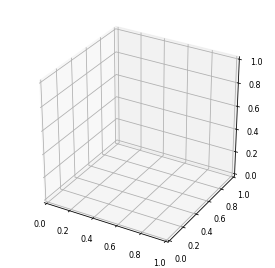

In [10]:
fig = plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 8})

ax = fig.add_subplot(221, projection='3d')
for idx,log in enumerate(first_runs):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], s = 1, label='Controller, first try subject '+str(idx))
define_plot_pos(ax)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(222, projection='3d')
for idx,log in enumerate(last_runs):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], s = 1, label='Controller, last try subject '+str(idx))
define_plot_pos(ax)

# Analyze control input for learning curve experiment

In [ ]:
# add control input column
for setup in logs:
    print('processing '+setup)
    for df in logs[setup]:
        df['controlInput'] = np.abs(np.linalg.norm(np.array([df['controlSpeed.x'],df['controlSpeed.y'],df['controlSpeed.z']]), axis=0))#*df['differentialTime']

In [ ]:
for setup in logs:
    print('processing '+setup)
    for df in logs[setup]:
        print(df['controlInput'].sum())

In [ ]:
def define_ctr_plot(ax):
    ax.set_ylim((-0.5,5))
    plt.xlabel('Time (s)')
    plt.ylabel('Control input u(t)')
    plt.legend()
    plt.show()

In [ ]:
"""fig = plt.figure(figsize=(10,10))

# define the subject
n=1

ax = fig.add_subplot(221)
ax.plot(logs['MotionCapture_First'][n]['absoluteTime'], logs['MotionCapture_First'][n]['controlInput'], label='MotionCapture first try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(222)
ax.plot(logs['Controller_First'][n]['absoluteTime'], logs['Controller_First'][n]['controlInput'],label='Controller first try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(223)
ax.plot(logs['MotionCapture_Last'][n]['absoluteTime'], logs['MotionCapture_Last'][n]['controlInput'],label='MotionCapture last try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(224)
ax.plot(logs['Controller_Last'][n]['absoluteTime'], logs['Controller_Last'][n]['controlInput'],label='Controller last try, subject '+str(n))
define_ctr_plot(ax)"""

fig = plt.figure(figsize=(5,5))

# define the subject
n=1

#ax = fig.add_subplot(111)
#ax.plot(logs['MotionCapture_First'][n]['absoluteTime'], logs['MotionCapture_First'][n]['controlInput'], label='MotionCapture first try, subject '+str(n))
#ax.plot(logs['Controller_First'][n]['absoluteTime'], logs['Controller_First'][n]['controlInput'],label='Controller first try, subject '+str(n))
#define_ctr_plot(ax)
#plt.savefig('learn_first_try_subject1.jpg')
ax = fig.add_subplot(111)
ax.plot(logs['MotionCapture_Last'][n]['absoluteTime'], logs['MotionCapture_Last'][n]['controlInput'],label='MotionCapture last try, subject '+str(n))
define_ctr_plot(ax)
ax.plot(logs['Controller_Last'][n]['absoluteTime'], logs['Controller_Last'][n]['controlInput'],label='Controller last try, subject '+str(n))
define_ctr_plot(ax)
plt.savefig('learn_last_try_subject1.jpg')

# Analyze collisions for learning curve experiment

In [ ]:
av_collisions = {"Controller_First" : 0,
                      "Controller_Last" : 0,
                      "MotionCapture_First" : 0,
                      "MotionCapture_Last" : 0}

In [ ]:
# sum number of collisions per type
for setup in logs:
    print('processing '+setup)
    temp = 0
    for df in logs[setup]:
        temp += np.sum(np.diff(df['collision'])==1)
    av_collisions[setup] = temp / len(logs[setup])

In [ ]:
fig = plt.figure()
plt.bar(av_collisions.keys(), av_collisions.values(), color='g')
plt.ylabel('Mean number of collisions per subject')
plt.show()